0/3
1/3
2/3
0/3
1/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


2/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


0/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


1/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


2/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


0/3
1/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


2/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


0/3
1/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


2/3


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


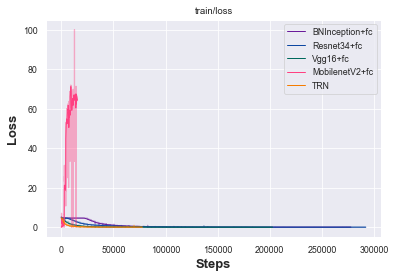

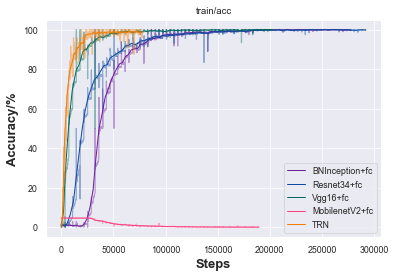

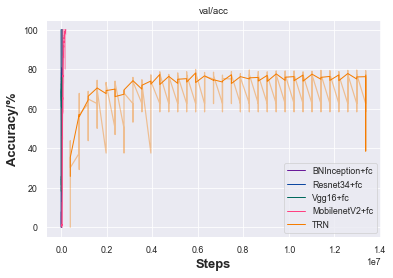

In [2]:
import argparse
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

from matplotlib import pyplot as plt
from matplotlib import colors as colors
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("paper")

def plot(params):
    log_path = params['logdir']
    smooth_space = params['smooth']
    color_code = params['color']

    acc = EventAccumulator(log_path)
    acc.Reload()

    # only support scalar now
    scalar_list = acc.Tags()['scalars']

    x_list = []
    y_list = []
    x_list_raw = []
    y_list_raw = []
    for tag in scalar_list:
        x = [int(s.step) for s in acc.Scalars(tag)]
        y = [s.value for s in acc.Scalars(tag)]

        # smooth curve
        x_ = []
        y_ = []
        for i in range(0, len(x), smooth_space):
            x_.append(x[i])
            y_.append(sum(y[i:i+smooth_space]) / float(smooth_space))    
        x_.append(x[-1])
        y_.append(y[-1])
        x_list.append(x_)
        y_list.append(y_)

        # raw curve
        x_list_raw.append(x)
        y_list_raw.append(y)

    #print(scalar_list)
    #print(len(x_list))
    for i in range(len(x_list)):
        print("%d/%d"%(i,len(x_list)))
        fig = plt.figure(i)
        plt.subplot(111)
        plt.title(scalar_list[i])
        plt.plot(x_list_raw[i], y_list_raw[i], color=colors.to_rgba(color_code, alpha=0.4))
        plt.plot(x_list[i], y_list[i], color=color_code, linewidth=1.0, label=params['label'])
        
        if 'acc' in scalar_list[i]:
            #plt.ylim(0.5, 0.9)
            plt.xlabel("Steps",fontsize=13,fontweight='bold')
            plt.ylabel("Accuracy/%",fontsize=13,fontweight='bold')
        elif 'loss' in scalar_list[i]:
            plt.xlabel("Steps",fontsize=13,fontweight='bold')
            plt.ylabel("Loss",fontsize=13,fontweight='bold')
        plt.legend()
            
        fig.savefig('_'.join(scalar_list[i].split('/'))+'.pdf', bbox_inches='tight')       

#绘制不同fc对比图的参数
parser = {}
parser['logdir'] = 'E:/pythonProjects/islr/runs/BNInception_class100/events.out.tfevents.1571665597.ITSK-20190902DK'
parser['smooth'] = 100
parser['color'] = '#FF0000'
parser['label'] = '1 layer' 

parser512 = {}
parser512['logdir'] = 'E:/pythonProjects/islr/runs/iSLR_RGB_BNInception_class100_hidden512/events.out.tfevents.1572080549.ITSK-20190902DK'
parser512['smooth'] = 100
parser512['color'] = '#4169E1'
parser512['label'] = '2 layer with 512 hidden units' 

parser1024 = {}
parser1024['logdir'] = 'E:/pythonProjects/islr/runs/iSLR_RGB_BNInception_class100_hidden1024/events.out.tfevents.1572154333.ITSK-20190902DK'
parser1024['smooth'] = 100
parser1024['color'] = '#40E0D0'
parser1024['label'] = '2 layer with 1024 hidden units' 

# plot(parser)
# plot(parser512)
# plot(parser1024)

#绘制不同CNN结构对比图的参数
parsertrn = {}
parsertrn['logdir'] = r'E:\pythonProjects\islr\experiment_result\TRN_class100\events.out.tfevents.1571839908.ITSK-20190902DK'
parsertrn['smooth'] = 100
parsertrn['color'] = '#F57C00'
parsertrn['label'] = 'TRN' 

parser = {}
parser['logdir'] = r'E:/pythonProjects/islr/experiment_result/BNInception_class100/events.out.tfevents.1571665597.ITSK-20190902DK'
parser['smooth'] = 100
parser['color'] = '#6A1B9A'
parser['label'] = 'BNInception+fc' 

parserresnet = {}
parserresnet['logdir'] = r'E:\pythonProjects\islr\experiment_result\Resnet34_class100\events.out.tfevents.1571727773.ITSK-20190902DK'
parserresnet['smooth'] = 100
parserresnet['color'] = '#0D47A1'
parserresnet['label'] = 'Resnet34+fc' 

parservgg = {}
parservgg['logdir'] = r'E:\pythonProjects\islr\experiment_result\vgg16_class100\events.out.tfevents.1571794127.ITSK-20190902DK'
parservgg['smooth'] = 100
parservgg['color'] = '#00695C'
parservgg['label'] = 'Vgg16+fc' 

parsermobile = {}
parsermobile['logdir'] = r'E:\pythonProjects\islr\runs\Nov04_22-16-22_ITSK-20190902DKiSLR_RGB_mobilenetv2_class100_hidden1024\events.out.tfevents.1572876982.ITSK-20190902DK'
parsermobile['smooth'] = 100
parsermobile['color'] = '#FF4081'
parsermobile['label'] = 'MobilenetV2+fc' 

plot(parser)
plot(parserresnet)
plot(parservgg)
plot(parsermobile)
plot(parsertrn)

plt.show()
